In [ ]:
#     E-retail factors for customer activation and retention:
####  Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store;
#   it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. 
#    A comprehensive review of the literature, theories and models have been carried out to propose the models for customer 
#    activation and customer retention. Using the Data analytics skills we are going to analysis the given dataset to understand 
#    major factors that contributed to the success of an e-commerce store which is also matching as said in the above theory

In [25]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [26]:
df= pd.read_excel(r"E:\fliprobo\dataset\customer_retention_dataset.xlsx")
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [27]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [29]:
df.shape

(269, 71)

In [30]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [31]:
df.isnull().sum().sum()

0

In [32]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [33]:
#we can clearly see that there are no null values.so we can continue with the data

df.describe()

4 What is the Pin Code of where you shop online from?
count                                         269.000000    
mean                                       220465.747212    
std                                        140524.341051    
min                                        110008.000000    
25%                                        122018.000000    
50%                                        201303.000000    
75%                                        201310.000000    
max                                        560037.000000

In [34]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

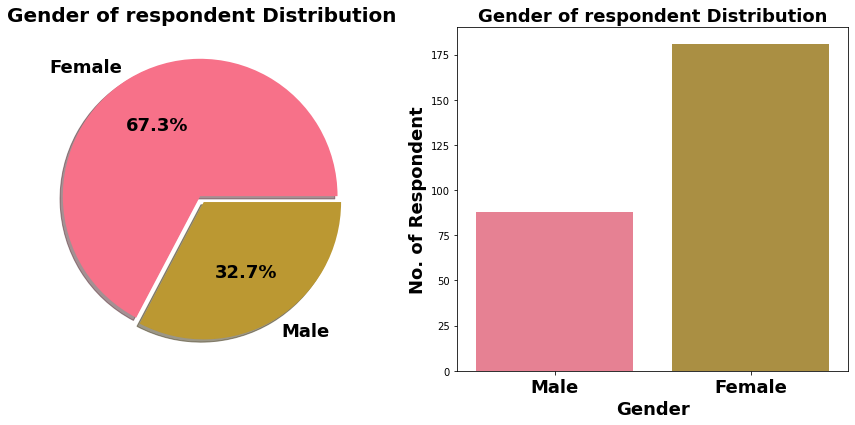

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [35]:
# Exploring Gender of Respondent
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['1Gender of respondent'].value_counts().plot.pie(explode=[0.025,0.025],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Gender of respondent Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('1Gender of respondent',data=df,ax=ax[1])
ax[1].set_title('Gender of respondent Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()
df['1Gender of respondent'].value_counts()

In [39]:
#Observation :
#The Majority of Respondent are Female (67.3%) & rest are Male respondent.

#This also shows that women are more shopping oriented than men.

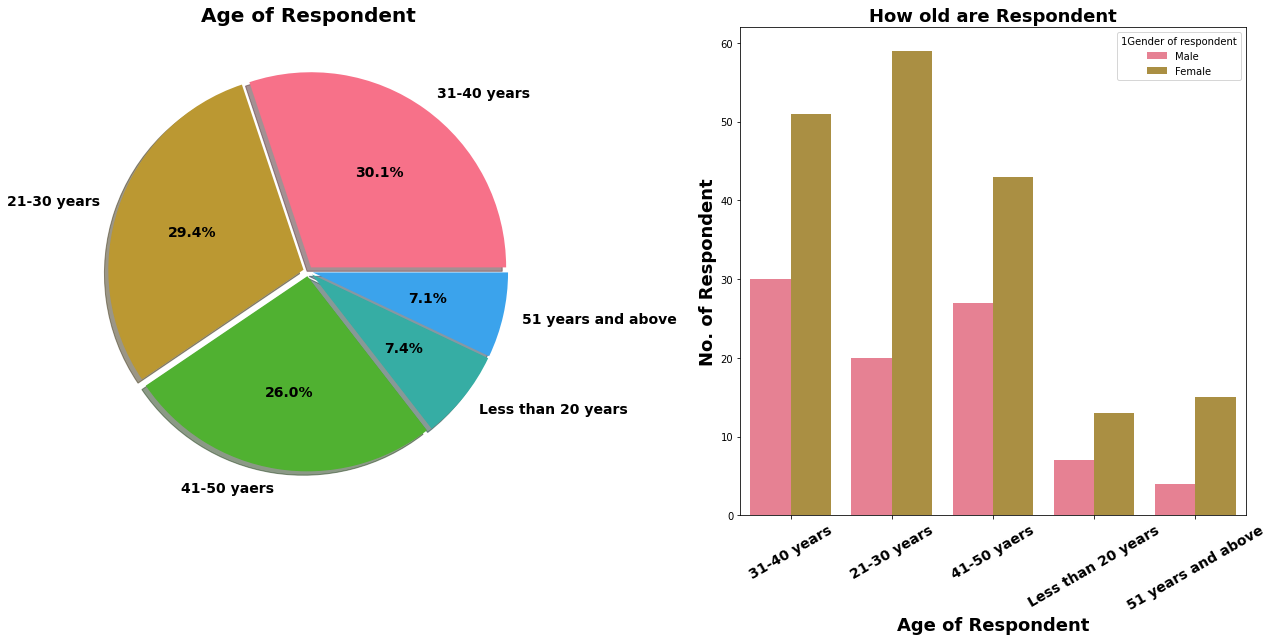

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

In [40]:
# Exploring Gender of Respondent
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,9))

df['2 How old are you? '].value_counts().plot.pie(explode=[0.025,0.025,0.025,0.025,0.025],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Age of Respondent', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('2 How old are you? ',hue =df['1Gender of respondent'] , data=df,ax=ax[1])
ax[1].set_title('How old are Respondent',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Age of Respondent",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.show()
df['2 How old are you? '].value_counts()

In [ ]:
# Observation :
# Majority of female customers are between age group of 21-40 years.
# Within Male Customers Tendency of online shopping seen among age group of 31-50 years.
# For both gender tendency of shopping is less for age greater than 51 years old.#
# This may be due to decrease in materialistic tendency with age or possible Less TECH-SAVY Generation.

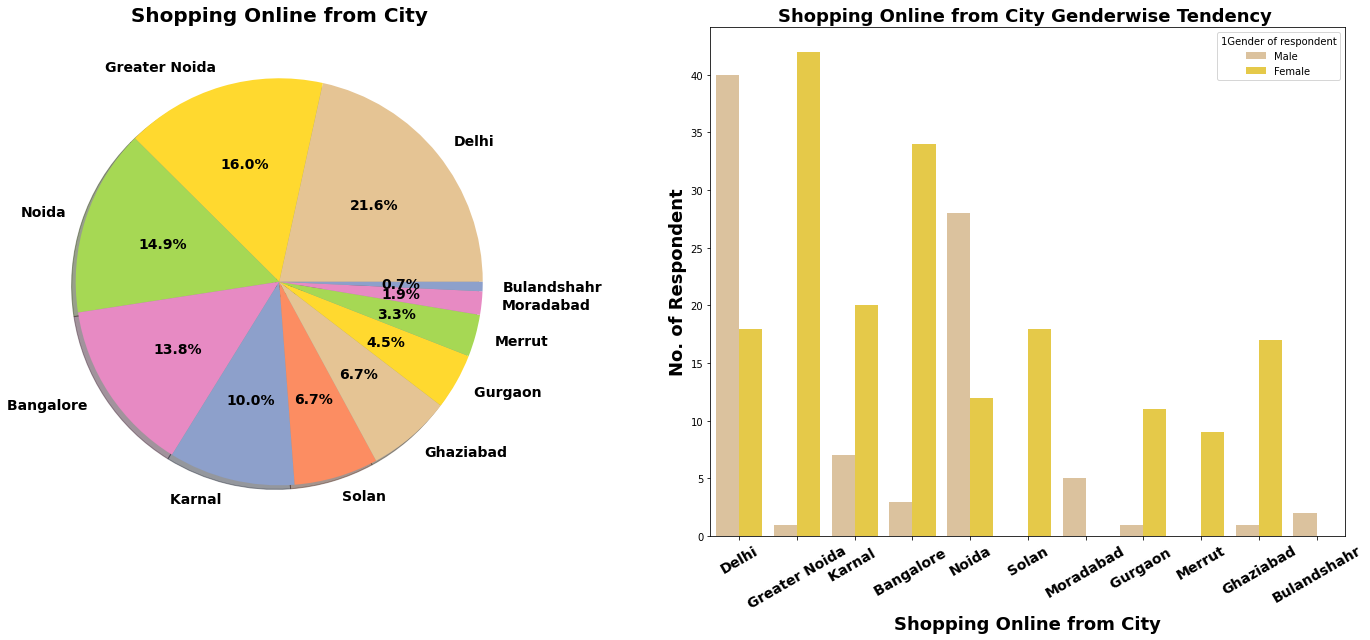

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

In [41]:
# Exploring How Long You are Shopping Online ?
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(20,9))

df['3 Which city do you shop online from?'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Shopping Online from City', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('3 Which city do you shop online from?',hue =df['1Gender of respondent'] , data=df,ax=ax[1])
ax[1].set_title('Shopping Online from City Genderwise Tendency ',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Shopping Online from City",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.show()
df['3 Which city do you shop online from?'].value_counts()

In [ ]:
#Observation :
#Most Online Shopping Customer belong to Metro Cities. and most of them are Male customer
#We can conclude that in Metro city like Delhi, Male have more tendency of online shopping.So shopping platfrom can target this population in marketing.

#In Tier 2 & 3 Cities Majority of online shopping customers are Females.
#We can target these customer population in these cities.

In [42]:
pd.crosstab([df['2 How old are you? ']  ,df['1Gender of respondent']],
            df["3 Which city do you shop online from?"],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
#Observation :
# We get interesting observation here in crosstab, as customer get older they have less tendency for shopping in turn they have less tendency to spend money.

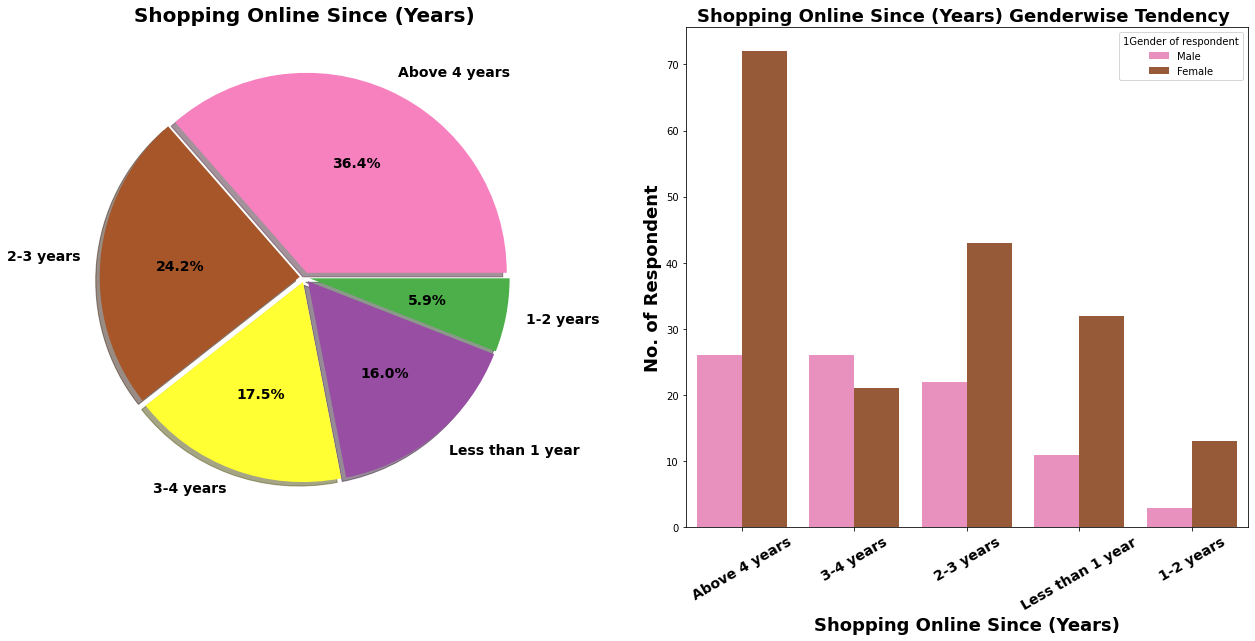

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [43]:
# Exploring How Long You are Shopping Online ?
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')
f,ax=plt.subplots(1,2,figsize=(18,9))

df['5 Since How Long You are Shopping Online ?'].value_counts().plot.pie(explode=[0.025,0.025,0.025,0.025,0.025],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Shopping Online Since (Years)', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('5 Since How Long You are Shopping Online ?',hue =df['1Gender of respondent'] , data=df,ax=ax[1])
ax[1].set_title('Shopping Online Since (Years) Genderwise Tendency ',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Shopping Online Since (Years)",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.show()
df['5 Since How Long You are Shopping Online ?'].value_counts()


In [ ]:
#Observation:
# 36.4% Respondent shopping online since 4 Yrs.
# Most of female shopping since 4 Yrs

In [44]:
pd.crosstab([df['5 Since How Long You are Shopping Online ?']  ],
            df["3 Which city do you shop online from?"],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
#Observation:
#Online shopping is less popular in tier 3 cities like Bulandshahr, Moradabad, Merrut.

In [46]:
df['6 How many times you have made an online purchase in the past 1 year?'] = df['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above','41 times and above')


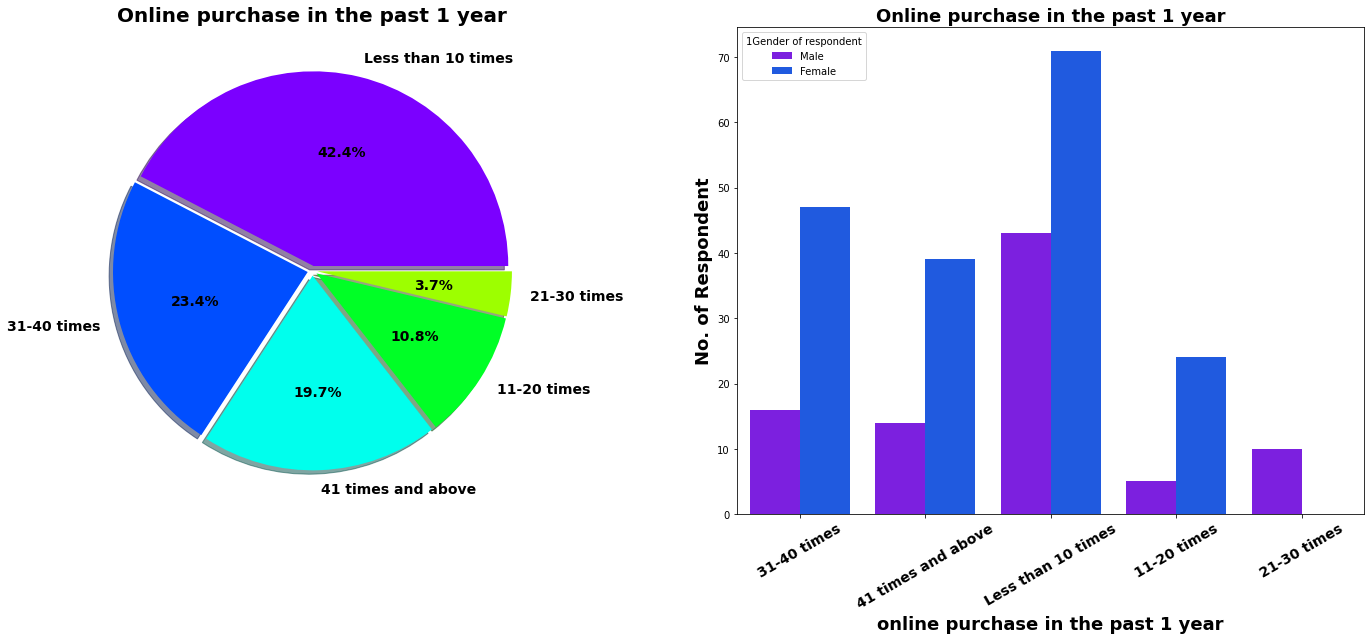

Less than 10 times    114
31-40 times            63
41 times and above     53
11-20 times            29
21-30 times            10
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

In [47]:
# Exploring How many times you have made an online purchase in the past 1 year?
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
f,ax=plt.subplots(1,2,figsize=(20,9))

df['6 How many times you have made an online purchase in the past 1 year?'].value_counts().plot.pie(explode=[0.025,0.025,0.025,0.025,0.025],autopct='%3.1f%%',
                textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Online purchase in the past 1 year', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('6 How many times you have made an online purchase in the past 1 year?',hue =df['1Gender of respondent'] , data=df,ax=ax[1])
ax[1].set_title('Online purchase in the past 1 year',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("online purchase in the past 1 year",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.show()
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

In [ ]:
#Observation :
# 42.4% Customers in last 1 year made online purchase less than 10 times.
# Around 19.7% customers have made online shoping for 41 times & more in last 1 year. Out which Majority are females.
# Another intersesting observation no female had made shopping in range of 21-30 times.

In [48]:
#############        Online Shopping in past 1 Years VS City of Shopping
pd.crosstab([df['6 How many times you have made an online purchase in the past 1 year?']  ],
            df["3 Which city do you shop online from?"],margins=True).style.background_gradient(cmap='spring_r')

In [ ]:
#We can see that most of customer making purchase for 41 times & more comes from city Delhi,Greater Noida, Noida.

In [49]:
df['7 How do you access the internet while shopping on-line?'] = df['7 How do you access the internet while shopping on-line?'].replace('Mobile internet','Mobile Internet')

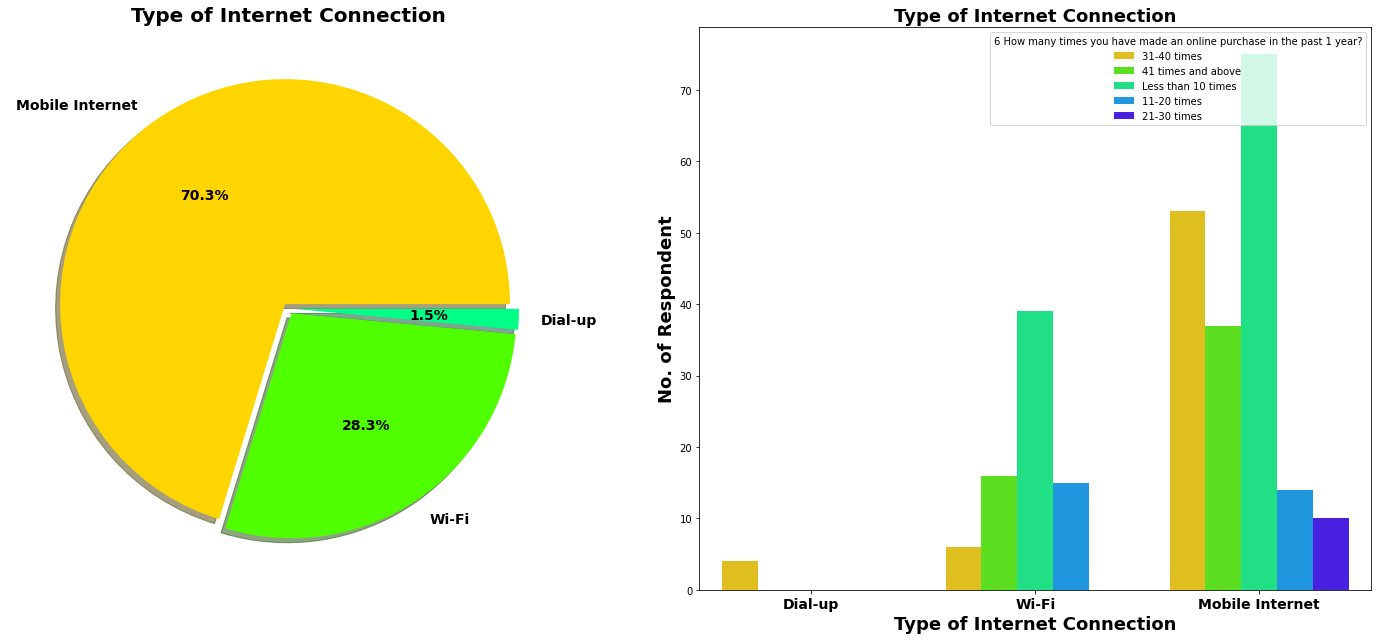

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [50]:
# Exploring How do you access the internet while shopping on-line?
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(20,9))

df['7 How do you access the internet while shopping on-line?'].value_counts().plot.pie(explode=[0.025,0.025,0.025],autopct='%3.1f%%',
                textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Type of Internet Connection', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('7 How do you access the internet while shopping on-line?' , hue = df['6 How many times you have made an online purchase in the past 1 year?'] ,data=df,ax=ax[1])
ax[1].set_title('Type of Internet Connection',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Type of Internet Connection",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()
df['7 How do you access the internet while shopping on-line?'].value_counts()

In [ ]:
#Observation :
# 70.3% Customers are mobile internet user followed by WiFi User.
# We can see that all customers who made online shopping for 41 times & more are using Mobile internet.
# Only 4 user are using Dial up Conection and all of them made online shopping for less than 10 times.


In [69]:
# Exploring feature describeing technological aspects related to internet serive & device
df.rename(columns= {'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'9 What is the screen size of your mobile device?',
                   '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'10 What is the operating system (OS) of your device?',
                   '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'11 What browser do you run on your device to access the website?',
                   '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'12 Which channel did you follow to arrive at your favorite online store for the first time?',
                   '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'13 After'},inplace=True)

In [70]:
Feature_1 = ['7 How do you access the internet while shopping on-line?','8 Which device do you use to access the online shopping?',
            '9 What is the screen size of your mobile device?','10 What is the operating system (OS) of your device?',
            '11 What browser do you run on your device to access the website?',
             '12 Which channel did you follow to arrive at your favorite online store for the first time?',
            '13 After first visit, how do you reach the online retail store?']

KeyError: '13 After first visit, how do you reach the online retail store?'

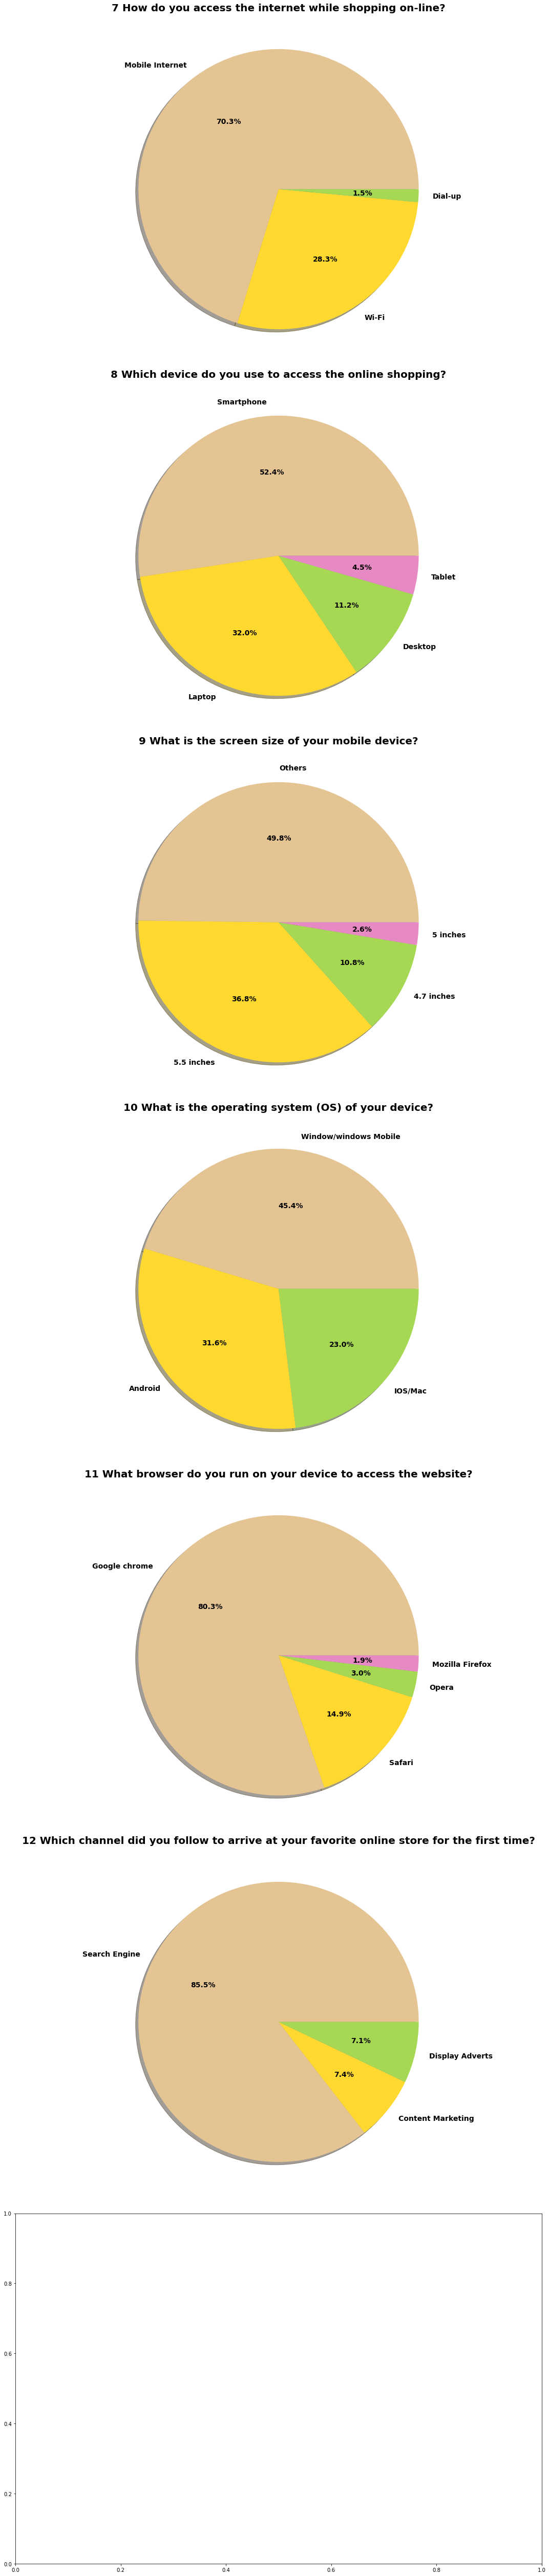

In [105]:
sns.set_palette('Set2_r')
plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for i in Feature_1:
    if plotnumber <=8:
        ax = plt.subplot(7,1,plotnumber)
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                textprops ={'fontweight': 'bold','fontsize':14}, shadow=True)
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.ylabel('')
    plotnumber+=1    
plt.show()

In [ ]:
#Observation:
#70.3% Customer uses mobile internet for shopping.
#52.4% Uses Smartphone followed by Laptop for online shopping.Company can make device oriented marketing strategy for different customers as per use of device
#Not all user uses smartphone for so we do not have screen size details of other user. Out of 52.4% Mobile users majority have 5.5 inch mobile display screen.
#45.4% customer have Windows operating system on their smartphone & laptop. Followed by it around 31.6% customer uses Android as OS which can come from both smartphone & Tablet.
#We can say that in terms of browser google chrome dominate market.
#We can see 85.5 % of Customer arrived on shopping platform through search engine. Ads & Marketing campign are not bring much lead. Most of customer who made online purchase because they want to buy product or due to discount on online shopping.
#After 1st Purchase 32% customer visit online store through mobile application and 32.3% by search engine.

In [73]:
pd.crosstab([df['8 Which device do you use to access the online shopping?']  ],
            df["10 What is the operating system (OS) of your device?"],margins=True).style.background_gradient(cmap='spring_r')

In [ ]:
####
# Observation :
#No Tablet with IOS operating system.
#We already know 45.4% Customer uses Windows Os and here we can see that almost all them come from desktop & laptop user.
#Surprising only 2 Customer with Apple laptop and no customer with Apple desktop.
#73 customers using android and 60 customers using Apple Iphone.
#Internet Connection Vs Device

In [74]:
pd.crosstab([df['7 How do you access the internet while shopping on-line?']  ],
            df["8 Which device do you use to access the online shopping?"],margins=True).style.background_gradient(cmap='winter_r')

In [ ]:
#Observation:
#No desktop with WiFi. All 30 desktop users are using mobile internet or dialup connection.
#Out of 141 Smartphone users 104 using mobile internet while rest using WiFi.

In [ ]:
#First Visit arrival channel Vs First- Visit afterwards Visiting channel

In [83]:
pd.crosstab([df['12 Which channel did you follow to arrive at your favorite online store for the first time?']  ],
            df["13 After first visit, how do you reach the online retail store?"],margins=True).style.background_gradient(cmap='summer_r')

KeyError: '13 After first visit, how do you reach the online retail store?'

In [ ]:

#Observation:
#For 2ed & afterward visit 71 customer arrived online store via application, followed by 59 via Direct URL & 18 Customer Via Promotional Email Marketing.
#Display adverts have very poor performance in landing customer on online store.Similar with Social Media marketing.For 2ed Purcase no one landed through display adverts on search engine.
#It is strong recommendation to companies that Do not spend more money over social media marketing & Display Adverts in their Digital Marketing compagin instead of that focus on Search engine Optimization & Email Marketing which will likely to be more effective to earlier.

In [84]:
df.rename(columns ={'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'14 How much time do you explore the e- retail store before making a purchase decision?',
                   '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'15 What is your preferred payment Option?',
                   '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
                   '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'17 Why did you abandon the “Bag”, “Shopping Cart”?'},inplace= True)

In [85]:
Feature_2 = ['14 How much time do you explore the e- retail store before making a purchase decision?',
             '15 What is your preferred payment Option?',
             '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
             '17 Why did you abandon the “Bag”, “Shopping Cart”?']

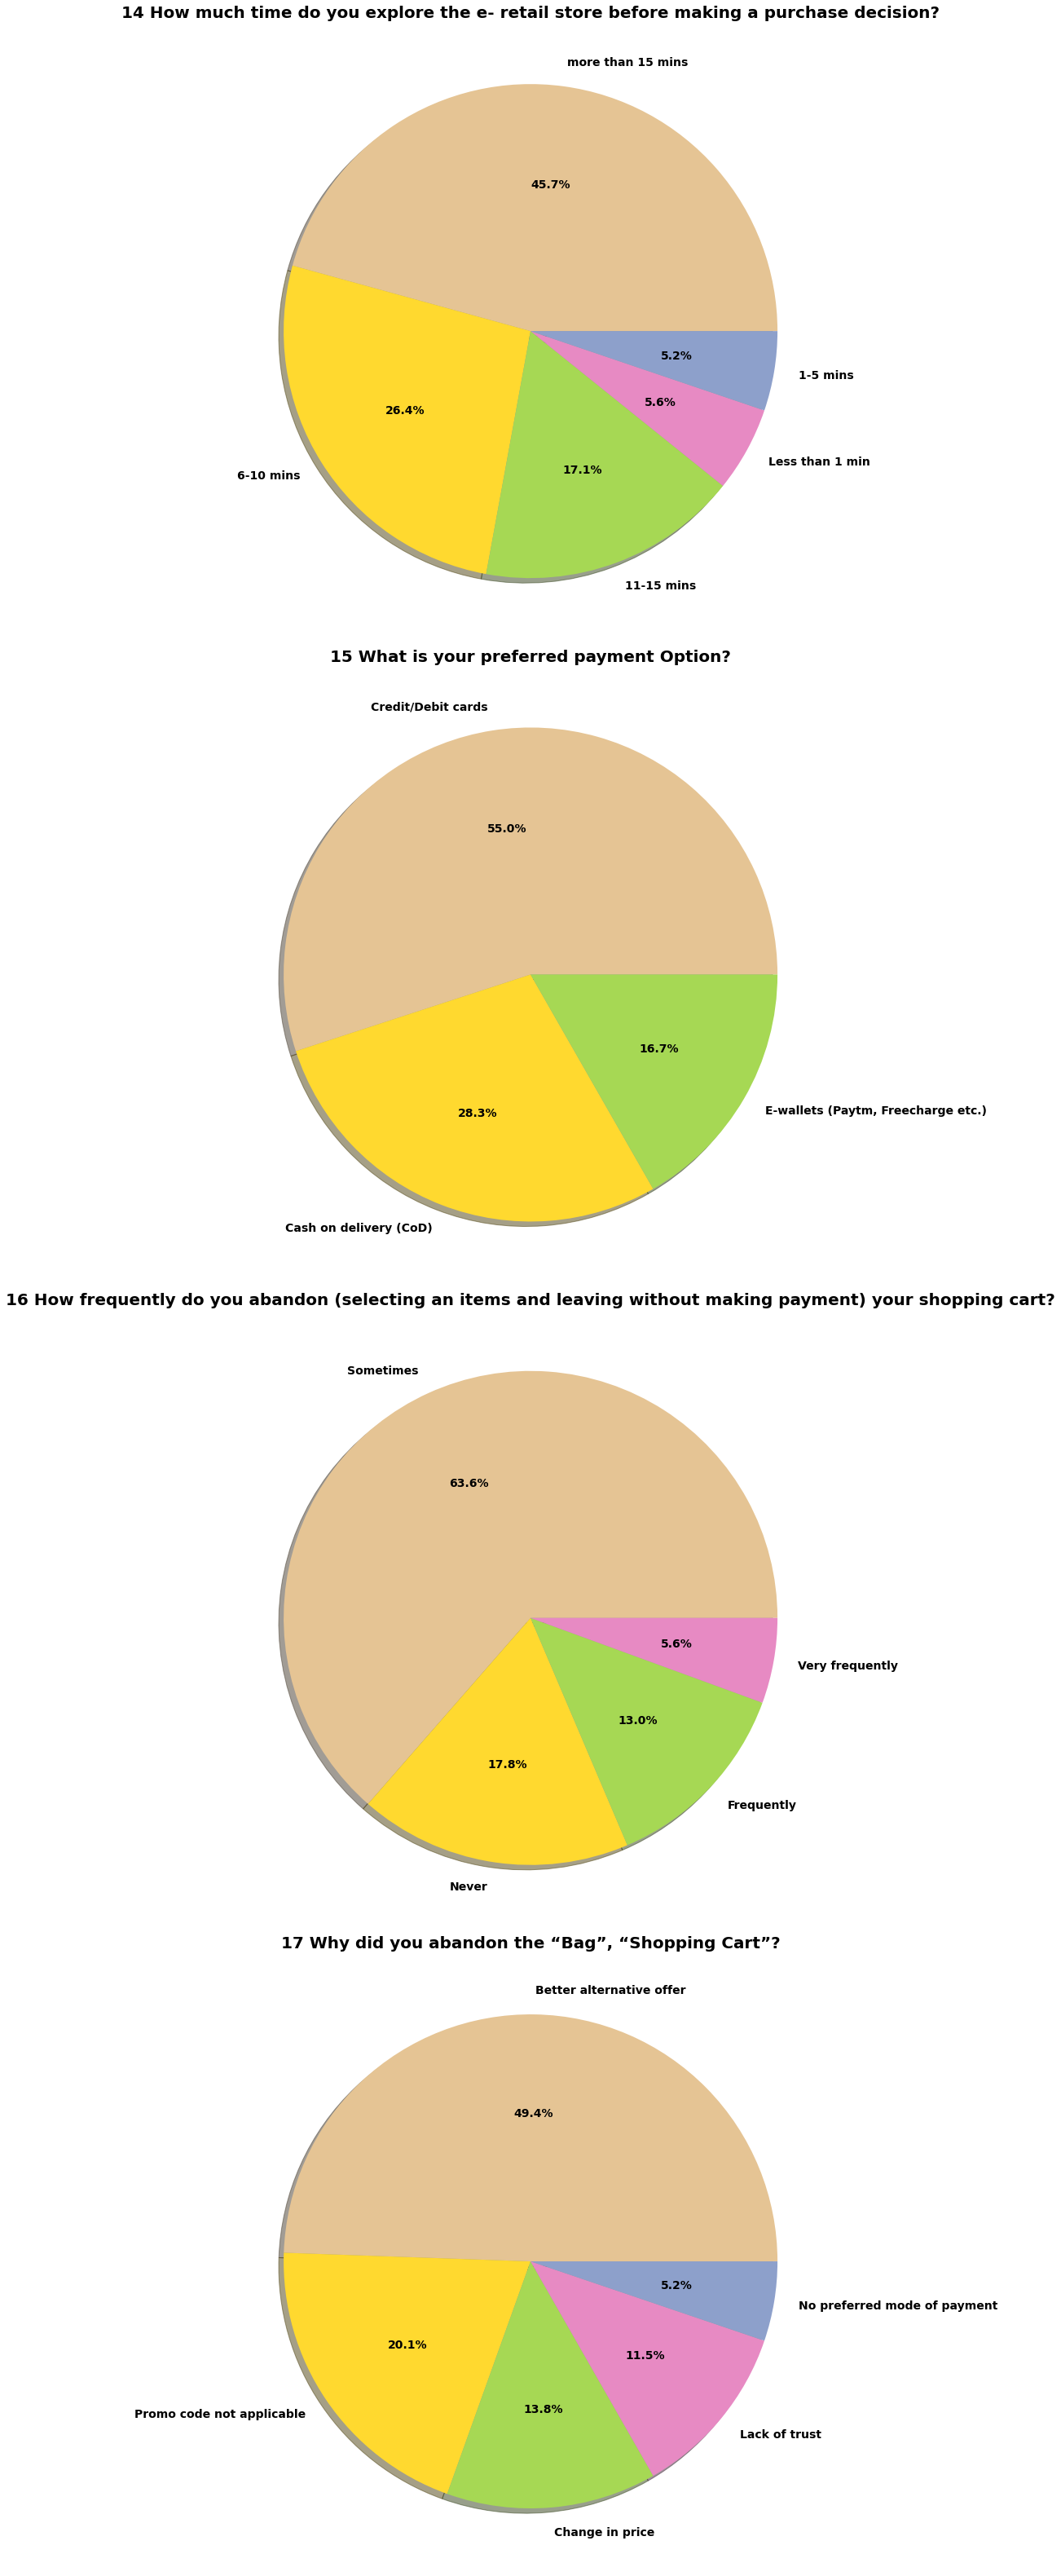

In [82]:
sns.set_palette('Set2_r')
plt.figure(figsize=(15,44), facecolor='white')
plotnumber =1
for i in Feature_2:
    if plotnumber <=4:
        ax = plt.subplot(4,1,plotnumber)
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                textprops ={'fontweight': 'bold','fontsize':14}, shadow=True)
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.ylabel('')
    plotnumber+=1    
plt.show()

In [ ]:
#Observation :
#45.7% of Customer spend more than 15 mins before making Purchase decision.Followed by the 17.1% customers with 11-15 mins before making purchase decision.
#We can see that 5.6% of customers purchase product less than 1 min. It will be interseting to find how many these customers made purchase in past 1 year.
#55% of customer paid using credit/debit cards while 28.3% customers still perfer cash on delivery.
#We can see that 63.6% of customer add product in cart but later leave without making payment. Surprising there is category of 17.8% customer who never abandon product without making payment.
#In next pie chart depict reason why customer change buying decision. Around 50% customers abandon cart due to better alternative offer which is obivious reason.Another most common reason to abandon purchase decision is promo code not applicable on particular product. Followed by next most common reason is change in price.
#If we add reason mention in previous point we can conclude that 84% customer abandon cart due to cost & discount tradeoff.

In [86]:
#Time Spend for Purchase decision VS Purchase count in Past 1 Year
pd.crosstab([df['14 How much time do you explore the e- retail store before making a purchase decision?']  ],
            df["6 How many times you have made an online purchase in the past 1 year?"],margins=True).style.background_gradient(cmap='summer_r')

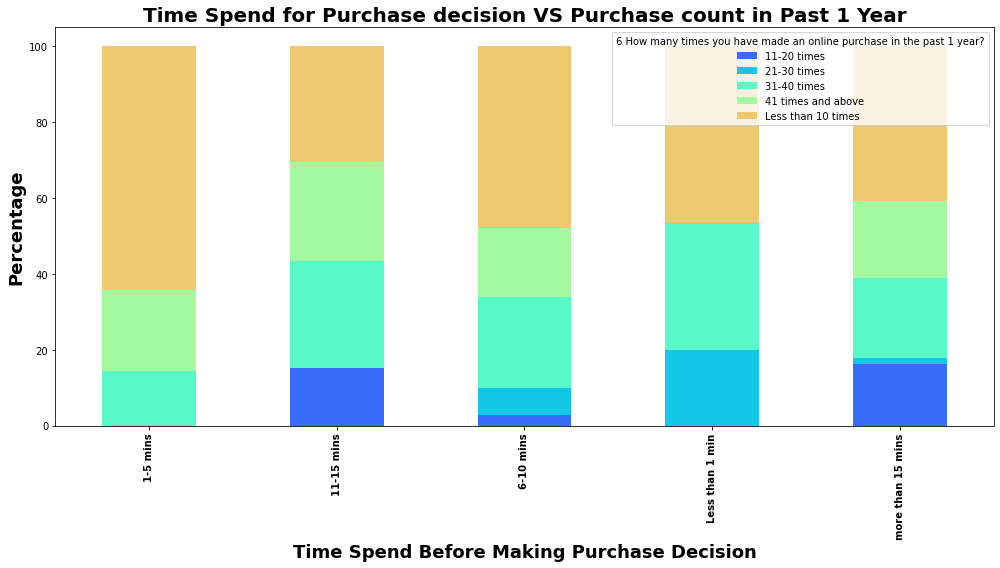

In [87]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['14 How much time do you explore the e- retail store before making a purchase decision?'],
            df["6 How many times you have made an online purchase in the past 1 year?"] )
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Time Spend for Purchase decision VS Purchase count in Past 1 Year', fontsize=20, fontweight='bold')
plt.xlabel('Time Spend Before Making Purchase Decision', fontsize=18,fontweight='bold')
plt.ylabel('Percentage', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [ ]:
#Observation :
#Here comes interseting observation about Customer who are spending more than 15 mins before making any purchase decision, out 45.7% these customer around 25 customer done online shopping more than 41 times in past year.
#15 Customer purchase shopping within less than 1 min, Majority of them ,7 customer made shopping less than 10 times in past year.

In [88]:
pd.crosstab([df['14 How much time do you explore the e- retail store before making a purchase decision?']  ],
            df["6 How many times you have made an online purchase in the past 1 year?"],margins=True).style.background_gradient(cmap='summer_r')

In [89]:
pd.crosstab([df['14 How much time do you explore the e- retail store before making a purchase decision?']  ],
            df["16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?"],margins=True).style.background_gradient(cmap='gnuplot')



In [90]:
#Exploration of Website Usability & performance related feature
Feature_3 = ['18 The content on the website must be easy to read and understand','19 Information on similar product to the one highlighted  is important for product comparison',
            '20 Complete information on listed seller and product being offered is important for purchase decision.','21 All relevant information on listed products must be stated clearly',
            '22 Ease of navigation in website','23 Loading and processing speed','24 User friendly Interface of the website',
            '25 Convenient Payment methods','26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time']

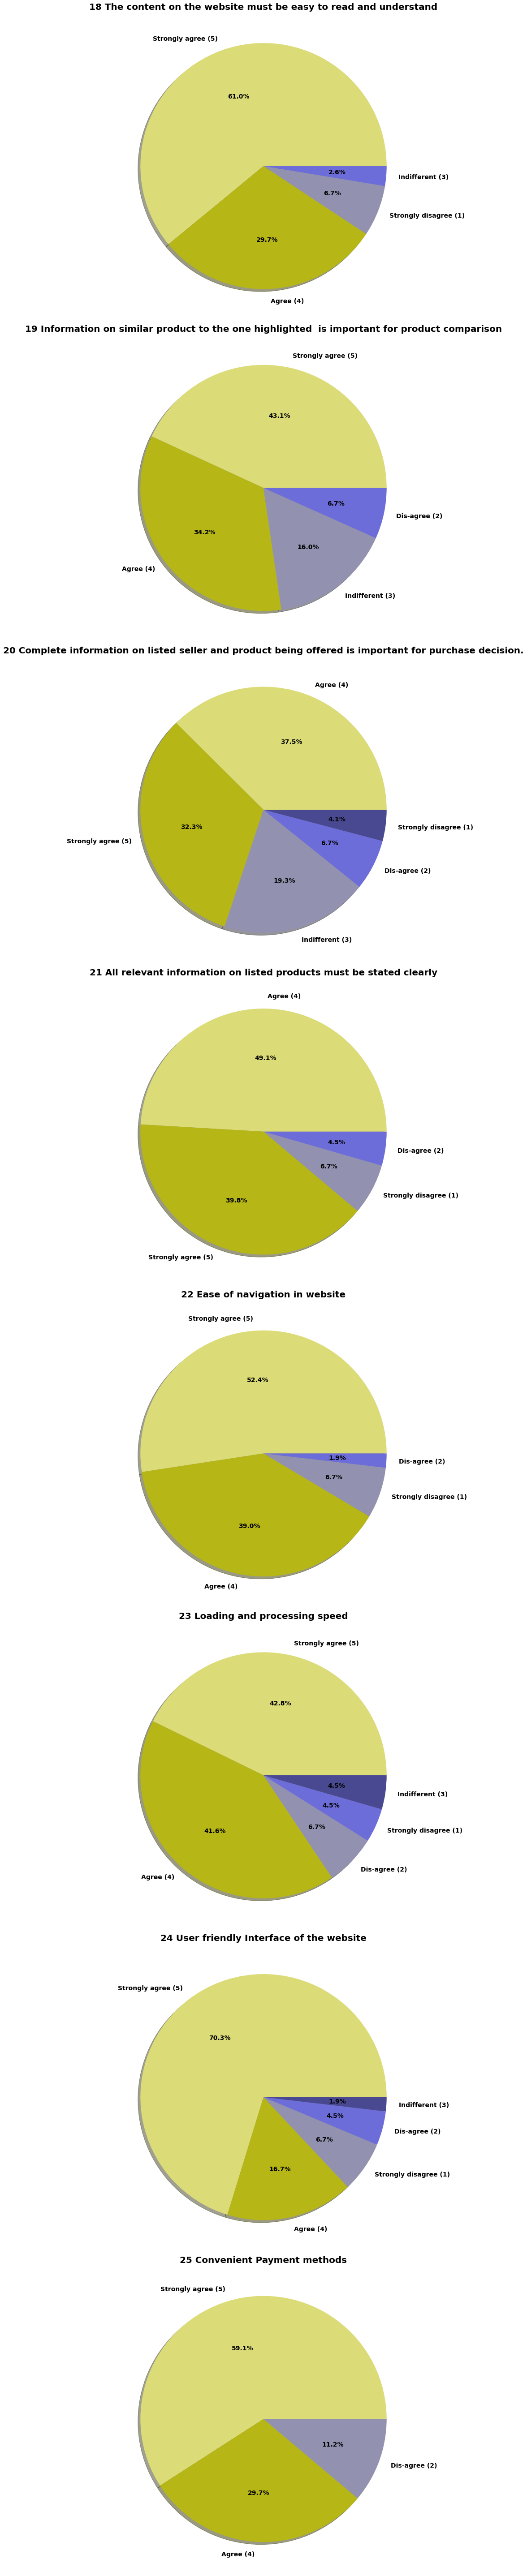

In [91]:
sns.set_palette('gist_stern_r')
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for i in Feature_3:
    if plotnumber <=8:
        ax = plt.subplot(8,1,plotnumber)
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                textprops ={'fontweight': 'bold','fontsize':14}, shadow=True)
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.ylabel('')
    plotnumber+=1    
plt.show()

In [ ]:
#Observation :
#61 % customer strongly agree and 29.7% customer agree that content on website must be easy to read and understand.
#43.1% customer strongly agree and 34.2% customer agree that information on similar product to hightlighted on website for product comparison.
#More than 60% of customer agree or strongly agree that complete information on listed seller and product being offered is important for purchase decision.
#More than 90% of customer agree or strongly agree that all relevant information on listed products must be stated clearly.
#Around 93% of customer agree or strongly agree that website should be easy for navigation.
#42.8 % customer strongly agree and 41.6 % customer agree over high loading & processing speed.
#70.3 % customer strongly agree and 16.7 % customer agree that website should be user friendly.

<Figure size 504x360 with 0 Axes>

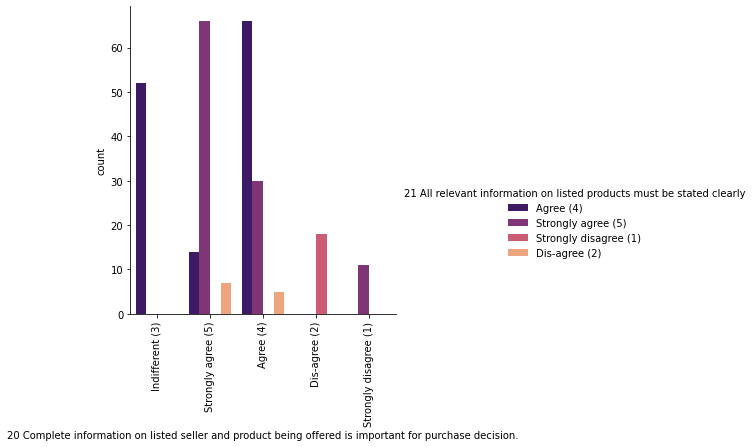

In [92]:
#Factor plot for Seller_ProductInfo
plt.figure(figsize = (7,5))
sns.factorplot('20 Complete information on listed seller and product being offered is important for purchase decision.',kind='count',data=df,
               hue='21 All relevant information on listed products must be stated clearly',palette="magma")
plt.xticks(rotation=90)
plt.show()



In [93]:
#Exploration of Online shopping store customer service requirement related features
Feature_4 = ['27 Empathy (readiness to assist with queries) towards the customers','28 Being able to guarantee the privacy of the customer',
            '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)','30 Online shopping gives monetary benefit and discounts',
            '31 Enjoyment is derived from shopping online','32 Shopping online is convenient and flexible',
            '33 Return and replacement policy of the e-tailer is important for purchase decision','34 Gaining access to loyalty programs is a benefit of shopping online',
            '35 Displaying quality Information on the website improves satisfaction of customers','36 User derive satisfaction while shopping on a good quality website or application',
            '37 Net Benefit derived from shopping online can lead to users satisfaction','38 User satisfaction cannot exist without trust']

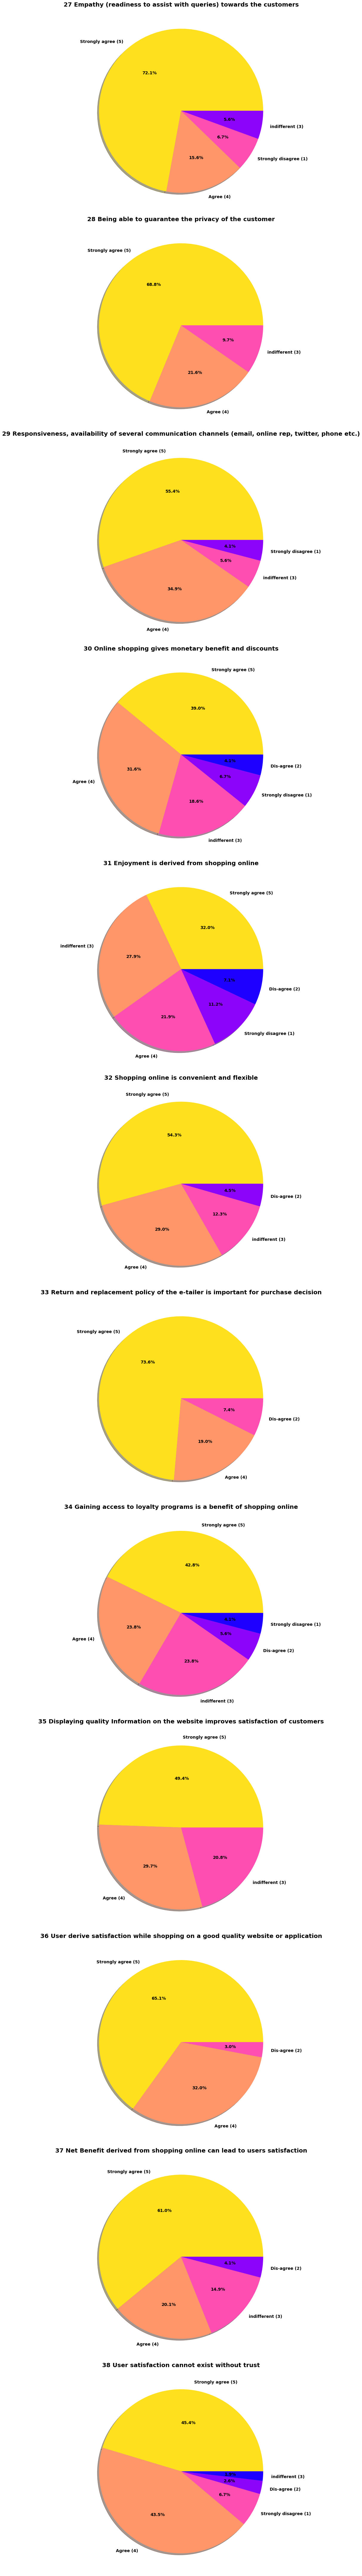

In [94]:
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(15,120), facecolor='white')
plotnumber =1
for i in Feature_4:
    if plotnumber <=12:
        ax = plt.subplot(12,1,plotnumber)
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                textprops ={'fontweight': 'bold','fontsize':14}, shadow=True)
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.ylabel('')
    plotnumber+=1    
plt.show()

In [95]:
#Exploring feature related to Customer online shopping experiences
Feature_5 = ['39 Offering a wide variety of listed product in several category','40 Provision of complete and relevant product information',
            '41 Monetary savings','42 The Convenience of patronizing the online retailer','43 Shopping on the website gives you the sense of adventure',
            '44 Shopping on your preferred e-tailer enhances your social status','45 You feel gratification shopping on your favorite e-tailer',
            '46 Shopping on the website helps you fulfill certain roles','47 Getting value for money spent']

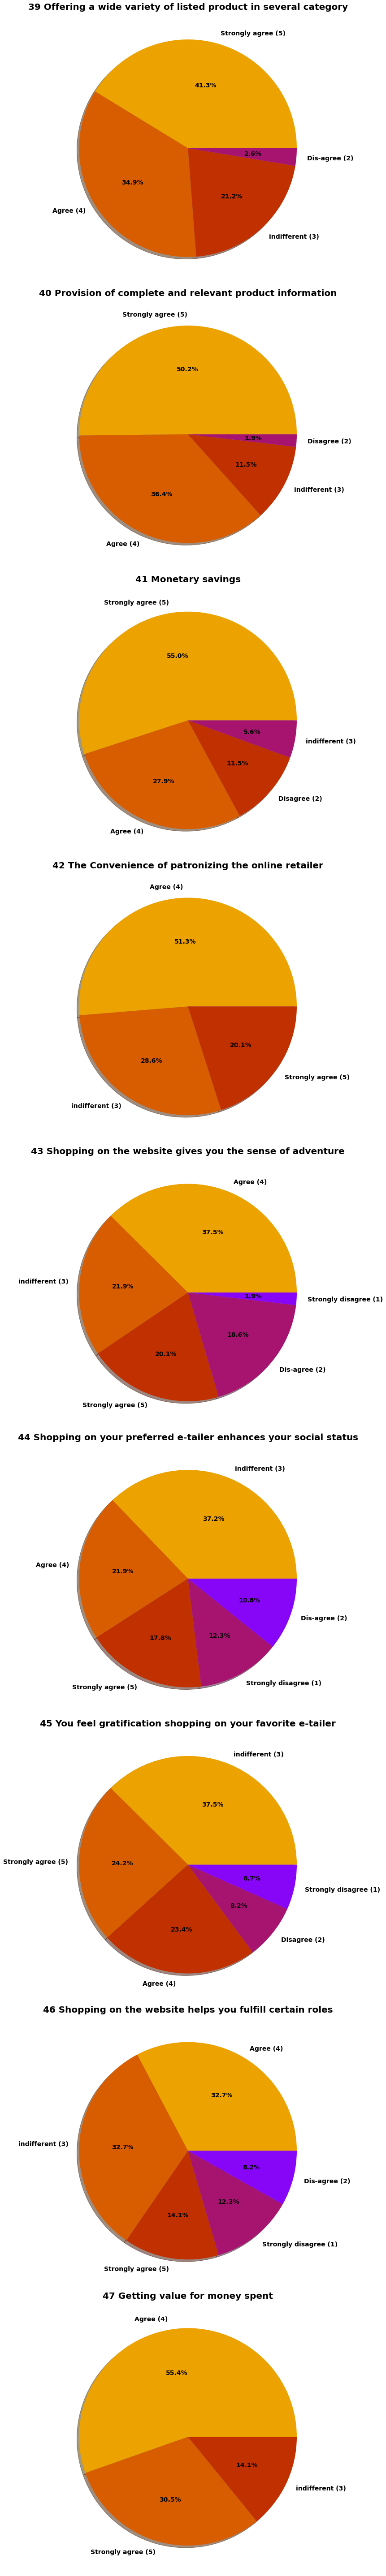

In [96]:
sns.set_palette('gnuplot_r')
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for i in Feature_5:
    if plotnumber <=9:
        ax = plt.subplot(9,1,plotnumber)
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                textprops ={'fontweight': 'bold','fontsize':14}, shadow=True)
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.ylabel('')
    plotnumber+=1    
plt.show()

In [ ]:
#Observation :
#50.2% Customer strongly agree & 36.4% customer agree that for good online shopping complete and relevant product information.
#Around 83% customer pursue online shopping for Monetary Savings.
#For 37.5 % customers Online shopping on website strongly gives the sense of adventure.
#We can see different peoples have different opinions about connection between e-tailer & social status.Same with gratification on favorite e-tailer.
#55.4% people strongly agree and 30.5% people agree that </u>they prefer online shopping beacause they get value of money spent.</u>

In [97]:
#Exploring Opinion on Online Shopping Platform Websites by Customer
df.rename(columns= {'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':
                   'From the following, tick any (or all) of the online retailers you have shopped from'},inplace=True)

In [98]:
Feature_6 = [
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',]

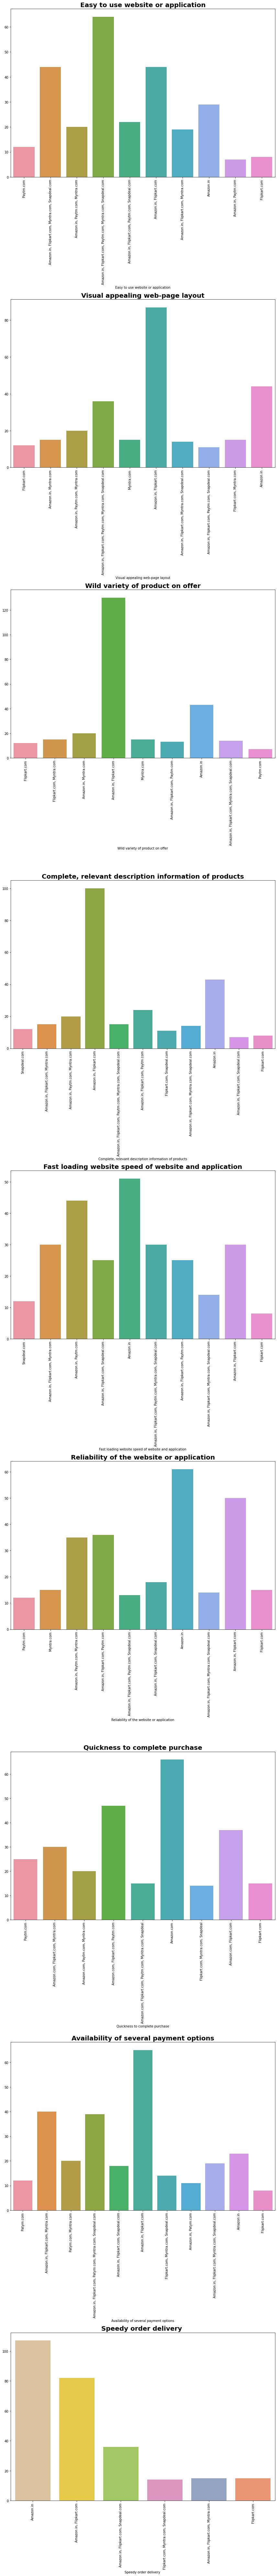

In [99]:
sns.set_palette('Set2_r')
plt.figure(figsize=(12,120), facecolor='white')
plotnumber =1
for i in Feature_6:
    if plotnumber <=12:
        ax = plt.subplot(10,1,plotnumber)
        sns.countplot(df[i])
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.xticks(rotation=90)
        plt.ylabel('')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
#Observation :
#Majority, 64 customers agree that Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are Easy to use website or application. *But Overall if we look at countplot of easy to use application & website Amazon.in got individually 1st Rank*.
##87 customers agree that Amazon.in, Flipkart.com have Visual appealing web-page layout than most of other market players.
#Around according to 125 people Amazon.in, Flipkart.com provides wide varity of offer on product.
#We *already know 50.2% Strongly agree over providing complete relevalent product information, and here we can see that 100 customer think that Amazon.in, Flipkart.com provides complete information* compare to others.
#Previously we know that 42.8 % customer strongly agree and 41.6 % customer agree over high loading & processing speed of website.Here we can see Majority of people think that *loading speed of Amazon.in is fastest while Flipkart.com slowest website to load*.
#In terms of Reliability of website or application again Amazon top list.
#Majority of people also think that Amazon.in tops the chart in terms of quickness purchase process compare to others.
#Majority of customers think that Amazon.in, Flipkart.com provides several payment options compare to others.
#Safe & Speed delivery very much deciding factor in terms of purchase. In terms of speed of delivery Amazon.in is much better than other online shopping platform and Flipkart.com worst among all in terms of speed delivery of product.

In [100]:
pd.crosstab([df['40 Provision of complete and relevant product information']  ],
            df["Complete, relevant description information of products"],margins=True).style.background_gradient(cmap='summer_r')

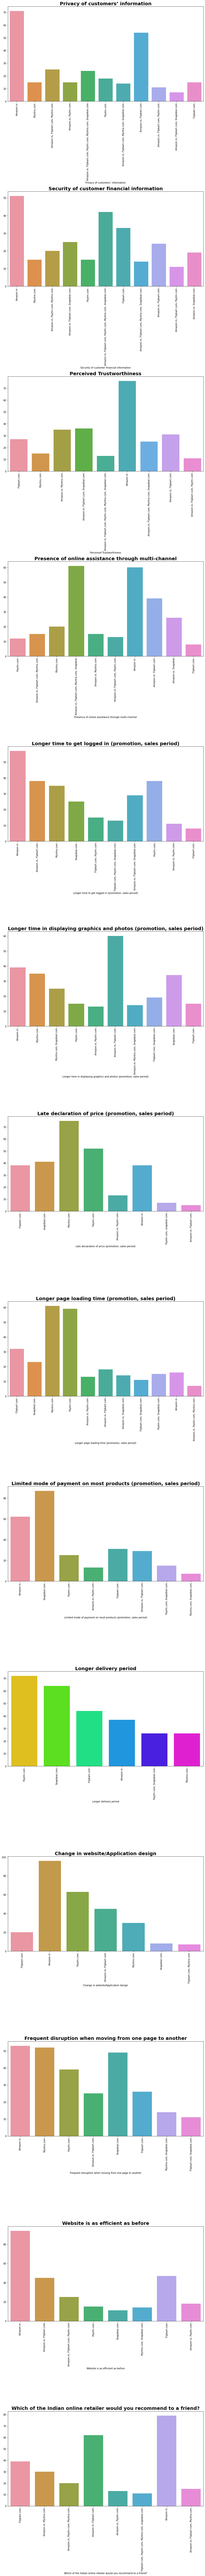

In [101]:
Feature_7 = ['Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Which of the Indian online retailer would you recommend to a friend?']
sns.set_palette('hsv')
plt.figure(figsize=(12,150), facecolor='white')
plotnumber =1
for i in Feature_7:
    if plotnumber <=14:
        ax = plt.subplot(14,1,plotnumber)
        sns.countplot(df[i])
        plt.title(i,fontsize=20,fontweight ='bold')
        plt.xticks(rotation=90)
        plt.ylabel('')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [104]:
#Observation :
#We already Know more than 90% Customer thinks that gaurantee on privacy of thier information is important for them.Majority of customers trust Amazon.in more than other shopping platform for Privacy of customers’ information
#Majority of customer trust Amazon.in followed by Flipkart.in over Security of thier financial information.We also see very few peoples trust payment platform paytm.
#Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com provide assistance through different multi channel.
#Longer time to get logged in can annoyed customer. *Amazon.in take longer time to logged in while Flipkart.com take least time among all*.
#Majority of people agree that Amazon.in, Flipkart.com takes longer time in displaying and photos.
#Myntra.com followed by Paytm.com take longer page loading time.
#Most of people want shorter delivery time frame, majority customer agree that Paytm.com takes longest time for delivery compare to others.
#Amazon.in website is as effient as ealier after updation.
#Majority 80 peoples recommanded Amazon.in to their friends.